In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches

In [117]:
# Load labor capacity data
ds = xr.open_dataset('../data/processed/GFDL/Monthly_Capacity/monthly_capacity_ens1-3_1950-2100.nc').rename({'__xarray_dataarray_variable__':'capacity'})

In [118]:
ds_base = ds.sel(time=slice('1980-01-31','1999-12-31')).mean(dim='ensemble').groupby('time.month').mean()['capacity']

In [119]:
ds = ds.sel(time=slice('2000-01-31',None))['capacity']

In [129]:
test_ds = ds.to_dataset()

In [136]:
test_ds['base'] = ds_base.sel(month=test_ds['time.month'],lat=test_ds['lat'],lon=test_ds['lon'])

In [142]:
ds_under = test_ds['capacity']<test_ds['base']

In [147]:
ds_3 = ds_under.groupby('time.year').sum() > 3

In [146]:
def emergence(ds,start_year):
    ds_thres = ds.nonzero()
    
    # If non-empty, index + startyear = ToE
    if len(ds_thres[0]) > 0:
        return start_year+(ds_thres[0][0].item())
    
    # If empty, return year after 2100
    return 2101

In [154]:
result = xr.apply_ufunc(emergence,ds_3,input_core_dims=[['year']],vectorize=True,kwargs={'start_year':2000})

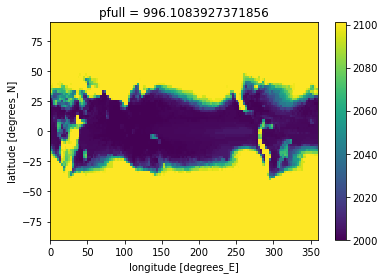

In [155]:
result.mean('ensemble').plot()

In [3]:
ensembles = ['010']

for ens in ensembles:
    # WBT data crunching
    # Path to data files for this ensemble member
    paths_TSA = '/local/ss23/CESM2_LE/ATM/RCP85/TSA/b.e21.*.f09_g17.LE2-1281.' + ens + '.clm2.h7.TSA.*.nc'
    
    # Concat along time dimension
    print(xr.open_mfdataset(paths_TSA,combine='by_coords',coords=['time'],chunks={'time':1095})['TSA'])

<xarray.DataArray 'TSA' (time: 353322, lat: 192, lon: 288)>
dask.array<concatenate, shape=(353322, 192, 288), dtype=float32, chunksize=(1095, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.25 357.5 358.75
  * time     (time) object 1980-01-01 00:00:00 ... 2101-01-01 00:00:00
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean


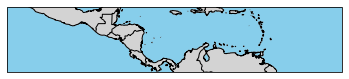

In [18]:
lf.map_region('Central America','GFDL')

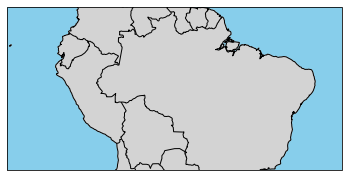

In [17]:
lf.map_region('Northern South America','CESM2')